# Install Requirements

In [ ]:
!pip install transformers datasets

# Corpus and Data Preprocessing

In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import glob
from datasets import load_dataset

In [196]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Read corpus from drive

In [197]:
path = "/content/drive/MyDrive/Common Ground Docs/Corpus/Magda_s version/Final_Clean/tsv/clean"
tsv_files = glob.glob(os.path.join(path, "*.tsv"))
DF = pd.DataFrame()

for f in tsv_files:
    df = pd.read_table(f, usecols=["Sentence", "Eno.", "Event", "Bel(A)", "Bel(B)", "CG(A)", "CG(B)"])
    DF = pd.concat([DF, df], ignore_index=True)
    print(f"File name: {f} and Length of events: {len(df)}")

File name: /content/drive/MyDrive/Common Ground Docs/Corpus/Magda_s version/Final_Clean/tsv/clean/1_Train_4245_Magda_230613.tsv and Length of events: 331
File name: /content/drive/MyDrive/Common Ground Docs/Corpus/Magda_s version/Final_Clean/tsv/clean/2_Train_4248_PlatinumMagdaFULL_230615.tsv and Length of events: 436
File name: /content/drive/MyDrive/Common Ground Docs/Corpus/Magda_s version/Final_Clean/tsv/clean/3_Train_4310_PlatinumMagda_230615.tsv and Length of events: 584
File name: /content/drive/MyDrive/Common Ground Docs/Corpus/Magda_s version/Final_Clean/tsv/clean/4_Test_4431_Magda_230615.tsv and Length of events: 389


In [198]:
DF

,Sentence,Eno.,Event,Bel(A),Bel(B),CG(A),CG(B)
0,"A: %um but although they solicit, they’re tryi...",1.1,"Although the company solicits, the company is ...",CT+ 1.1,CT+ 1.1,JA 1.1,JA 1.1
1,NaN,1.2,The company solicits,CT+ 1.2,CT+ 1.2,IN 1.2,IN 1.2
2,NaN,1.3,The company is trying to solicit more througho...,CT+ 1.3,CT+ 1.3,JA 1.3,JA 1.3
3,B: mhm.,2.0,NaN,NaN,NaN,NaN,NaN
4,A: although they’ve had most interest in &Japa...,3.0,The company have had most interest in Japan,CT+ 3,CT+ 3,JA 3,JA 3
...,...,...,...,...,...,...,...
1735,NaN,208.3,A's sons never treat one another like A and B'...,PS 208.3,PS 208.3,JA 208.3,JA 208.3
1736,B: True. I don’t think my kids will be that wa...,209.1,B doesn't think B's kids will be like A and B'...,CT+ 209.1,CT+ 209.1,JA 209.1,JA 209.1
1737,NaN,209.2,B's kids will be like A and B's mom and dad,PS 209.2,PS 209.2,JA 209.2,JA 209.2
1738,A: And he just looked at me. [channel noise],210.0,A and B's dad just looked at A,CT+ 210,CT+ 210,JA 210,JA 210


### Preprocessing

In [199]:
DF = DF.dropna(how='all')

In [200]:
DF['Event'] = DF['Event'].str.strip()
DF['Event'] = DF['Event'].replace("", "None")
DF = DF.fillna("None")

In [201]:
one_sum, more_sum = 0, 0

for record in DF['Bel(A)']:
    if "," in record:
        if more_sum<10: print(record)
        more_sum+=1
    else:
        one_sum+=1

print(one_sum, more_sum)

CT+ 89.1,CT+ 87.3
CT+ 118,CT- 117.2
CT+ 123.1,NB 123.2
CT- 123.2,CT+ 126.1
CT+ 146,CT+ 144.2
PS 3.5,CT- 3.2,CT- 3.1
CT+ 97,CT+ 97
CT+ 204.4,PS 204.3
CT- 142.4,CT+ 144
CT+ 228.4,CT- 227.2
1716 24


In [202]:
DF['CG(A)'] = DF['CG(A)'].str.split(",").str[0]
DF['CG(B)'] = DF['CG(B)'].str.split(",").str[0]
DF['Bel(A)'] = DF['Bel(A)'].str.split(",").str[0]
DF['Bel(B)'] = DF['Bel(B)'].str.split(",").str[0]

In [203]:
one_sum, more_sum = 0, 0

for record in DF['Bel(A)']:
    if "," in record:
        if more_sum<10: print(record)
        more_sum+=1
    else:
        one_sum+=1

print(one_sum, more_sum)

1740 0


In [204]:
DF

,Sentence,Eno.,Event,Bel(A),Bel(B),CG(A),CG(B)
0,"A: %um but although they solicit, they’re tryi...",1.1,"Although the company solicits, the company is ...",CT+ 1.1,CT+ 1.1,JA 1.1,JA 1.1
1,None,1.2,The company solicits,CT+ 1.2,CT+ 1.2,IN 1.2,IN 1.2
2,None,1.3,The company is trying to solicit more througho...,CT+ 1.3,CT+ 1.3,JA 1.3,JA 1.3
3,B: mhm.,2.0,None,None,None,None,None
4,A: although they’ve had most interest in &Japa...,3.0,The company have had most interest in Japan,CT+ 3,CT+ 3,JA 3,JA 3
...,...,...,...,...,...,...,...
1735,None,208.3,A's sons never treat one another like A and B'...,PS 208.3,PS 208.3,JA 208.3,JA 208.3
1736,B: True. I don’t think my kids will be that wa...,209.1,B doesn't think B's kids will be like A and B'...,CT+ 209.1,CT+ 209.1,JA 209.1,JA 209.1
1737,None,209.2,B's kids will be like A and B's mom and dad,PS 209.2,PS 209.2,JA 209.2,JA 209.2
1738,A: And he just looked at me. [channel noise],210.0,A and B's dad just looked at A,CT+ 210,CT+ 210,JA 210,JA 210


In [205]:
tmp_SUM = 0
for i in range (len(DF['Bel(A)'])):
  record = DF['Bel(A)'][i]
  if len(record.split(" "))>1:
    tag, event_number = record.split(" ")[0], record.split(" ")[1].strip()
    if float(event_number) != float(str(DF['Eno.'][i]).strip()):
      print(DF['Eno.'][i], event_number, DF['Bel(A)'][i], DF['Bel(B)'][i])
      tmp_SUM += 1
print(tmp_SUM)

125.0 123.1 CT+ 123.1 CT+ 123.1
126.1 123.2 CT- 123.2 CT+ 126.1
41.0 39.3 CT+ 39.3 None
217.0 216.2 CT+ 216.2 None
144.0 142.4 CT- 142.4 CT+ 144
274.1 270.2 CT+ 270.2 CT+ 270.2
283.1 280.2 CT- 280.2 CT+ 283.1
287.0 286.2 CT+ 286.2 None
290.0 288.2 CT+ 288.2 None
292.1 291.3 CT+ 291.3 CT+ 292.1
320.1 318.3 CT+ 318.3 CT+ 320.1
334.0 330.2 CT- 330.2 CT- 330.2
3.0 2.2 CT+ 2.2 None
18.0 17.2 CT+ 17.2 CT+ 18
24.1 23.2 CT- 23.2 CT+ 24.1
34.0 29.2 CT+ 29.2 CT+ 34
43.0 42.3 CT+ 42.3 None
58.0 57.2 CT- 57.2 CT+ 58
151.0 150.2 CT+ 150.2 None
190.0 189.2 CT+ 189.2 None
20


In [206]:
pattern = "[\d]+"
matches = DF['Event'].str.contains(pattern)
DF[matches]

,Sentence,Eno.,Event,Bel(A),Bel(B),CG(A),CG(B)
439,None,67.3,B asks if 10 month old baby is not too young t...,CT+ 67.3,CT+ 67.3,JA 67.3,JA 67.3
440,None,67.4,10 month old baby is not too young to travel with,PS 67.4,CT+ 67.4,None,None
446,None,71.3,It would be like much easier to travel to visi...,CT+ 71.3,CT+ 71.3,JA 71.3,JA 71.3
447,None,71.4,B's baby was 10 weeks,CT- 71.4,CT- 71.4,RT 71.4,RT 71.4
454,None,72.7,One could probably go like skydiving or someth...,CT- 72.7,CT- 72.7,RT 72.7,RT 72.7
455,None,72.8,One could not probably go like skydiving or so...,CT+ 72.8,CT+ 72.8,JA 72.8,JA 72.8
505,None,102.2,B will find 102 hard to believe,CT+ 102.2,CT+ 102.2,JA 102.2,JA 102.2
789,None,10.2,So Mae's mom told A and Robert about events im...,CT+ 10.2,CT+ 10.2,JA 10.2,JA 10.2


In [207]:
DF['Bel(A)'] = DF['Bel(A)'].replace(to_replace=r'[.\d]+', value='', regex=True).str.strip()
DF['Bel(B)'] = DF['Bel(B)'].replace(to_replace=r'[.\d]+', value='', regex=True).str.strip()
DF['CG(A)'] = DF['CG(A)'].replace(to_replace=r'[.\d]+', value='', regex=True).str.strip()
DF['CG(B)'] = DF['CG(B)'].replace(to_replace=r'[.\d]+', value='', regex=True).str.strip()

In [208]:
sum = 0
for i in range(len(DF["Bel(A)"])):
    record = DF["Bel(A)"][i]
    if record == '':
      if sum<10: print(DF["Event"][i])
      sum += 1
print(sum)

Jody's going to be shocked that B heard from A
B heard from A
None
(If using the pump was a choice in one's life)
None
None
B is trying to learn about B's options regarding baby feeding
B asks A if going up to Connecticut was another adventure
None
9


In [209]:
for i in range(10):
    print(f"{i}. Event: {DF['Event'][i]}, Bel(A): {DF['Bel(A)'][i]}, Bel(B): {DF['Bel(B)'][i]}, CG(A): {DF['CG(A)'][i]}, CG(B): {DF['CG(B)'][i]}")

0. Event: Although the company solicits, the company is trying to solicit more throughout the globe instead of just Japan, Bel(A): CT+, Bel(B): CT+, CG(A): JA, CG(B): JA
1. Event: The company solicits, Bel(A): CT+, Bel(B): CT+, CG(A): IN, CG(B): IN
2. Event: The company is trying to solicit more throughout the globe instead of just Japan, Bel(A): CT+, Bel(B): CT+, CG(A): JA, CG(B): JA
3. Event: None, Bel(A): None, Bel(B): None, CG(A): None, CG(B): None
4. Event: The company have had most interest in Japan, Bel(A): CT+, Bel(B): CT+, CG(A): JA, CG(B): JA
5. Event: None, Bel(A): None, Bel(B): None, CG(A): None, CG(B): None
6. Event: A teaches two classes, Bel(A): CT+, Bel(B): CT+, CG(A): JA, CG(B): JA
7. Event: A does administrative work to make connections for the company representatives to have tours, Bel(A): CT+, Bel(B): CT+, CG(A): JA, CG(B): JA
8. Event: A does administrative work, Bel(A): CT+, Bel(B): CT+, CG(A): JA, CG(B): JA
9. Event: A makes connections for the company representa

In [210]:
mapping_Bel = {'': 0, 'None': 0, 'CT+': 1, 'CT-': 2, 'PS': 3, 'NB': 4}
mapping_CG = {'': 0, 'None': 0, 'JA': 1, 'IN': 2, 'RT': 3, 'AM': 4}

DF['Bel(A)'] = DF['Bel(A)'].map(mapping_Bel)
DF['Bel(B)'] = DF['Bel(B)'].map(mapping_Bel)
DF['CG(A)'] = DF['CG(A)'].map(mapping_CG)
DF['CG(B)'] = DF['CG(B)'].map(mapping_CG)

# Corpus visualization

In [211]:
Bel_A_tags, Bel_B_tags, CG_A_tags, CG_B_tags = {}, {}, {}, {}

for i in range(len(DF['Bel(A)'])):
    tag = DF['Bel(A)'][i]
    if tag not in Bel_A_tags.keys(): Bel_A_tags[tag]=0
    if tag in Bel_A_tags.keys(): Bel_A_tags[tag]+=1

    tag = DF['Bel(B)'][i]
    if tag not in Bel_B_tags.keys(): Bel_B_tags[tag]=0
    if tag in Bel_B_tags.keys(): Bel_B_tags[tag]+=1

    tag = DF['CG(A)'][i]
    if tag not in CG_A_tags.keys(): CG_A_tags[tag]=0
    if tag in CG_A_tags.keys(): CG_A_tags[tag]+=1

    tag = DF['CG(B)'][i]
    if tag not in CG_B_tags.keys(): CG_B_tags[tag]=0
    if tag in CG_B_tags.keys(): CG_B_tags[tag]+=1

In [212]:
Bel_A_tags = dict(sorted(Bel_A_tags.items()))
Bel_B_tags = dict(sorted(Bel_B_tags.items()))
CG_A_tags = dict(sorted(CG_A_tags.items()))
CG_B_tags = dict(sorted(CG_B_tags.items()))

In [213]:
print("Bel_A_tags: ", Bel_A_tags)
print("Bel_B_tags: ", Bel_B_tags)
print("CG_A_tags: ", CG_A_tags)
print("CG_B_tags: ", CG_B_tags)

Bel_A_tags:  {0: 466, 1: 1045, 2: 89, 3: 98, 4: 42}
Bel_B_tags:  {0: 464, 1: 1054, 2: 89, 3: 86, 4: 47}
CG_A_tags:  {0: 531, 1: 1017, 2: 98, 3: 94}
CG_B_tags:  {0: 531, 1: 1015, 2: 98, 3: 96}


In [214]:
def corpus_visualizer(title, dictionary, color="b", width=20, height=5):
    plt.figure(figsize=(width, height), dpi=80)
    plt.title(f'{title}')
    plt.bar(list(dictionary.keys()), dictionary.values(), color=color)

    for i in range(len(dictionary.keys())):
        plt.text(x=i, y=list(dictionary.values())[i]+1, s=str(list(dictionary.values())[i]), ha='center')

    plt.show()

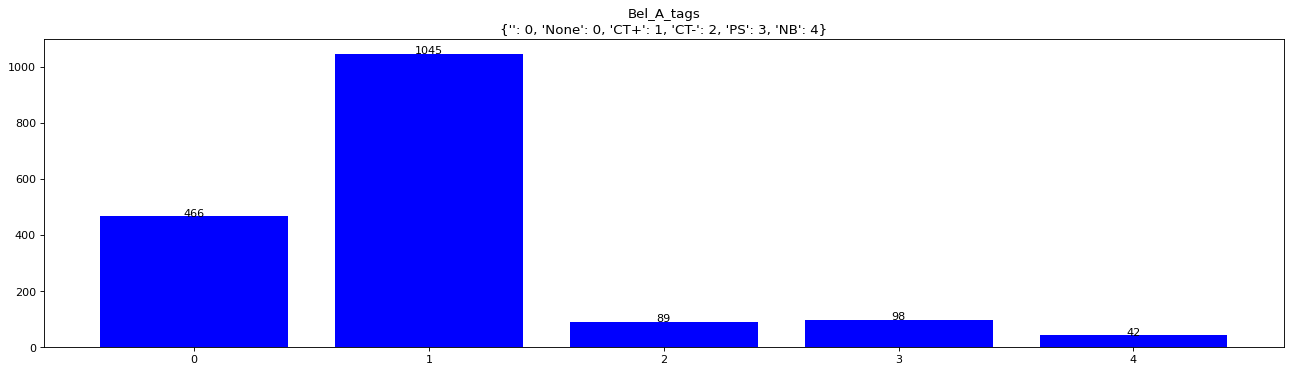

In [215]:
corpus_visualizer(f"Bel_A_tags\n{mapping_Bel}", Bel_A_tags)

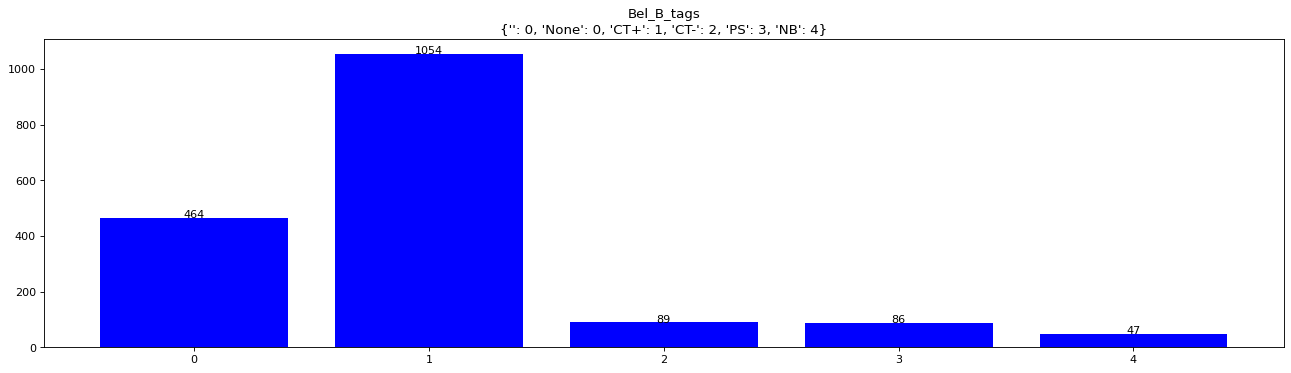

In [216]:
corpus_visualizer(f"Bel_B_tags\n{mapping_Bel}", Bel_B_tags)

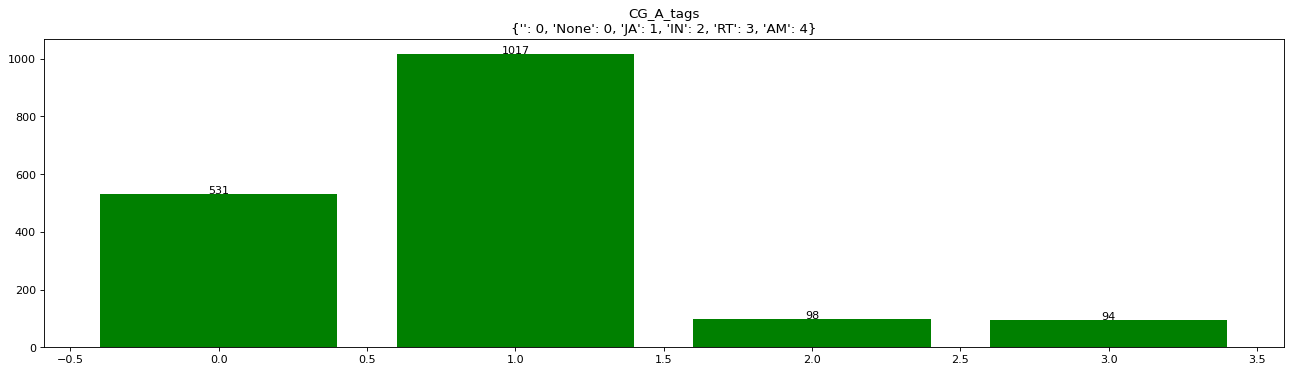

In [217]:
corpus_visualizer(f"CG_A_tags\n{mapping_CG}", CG_A_tags, color="g")

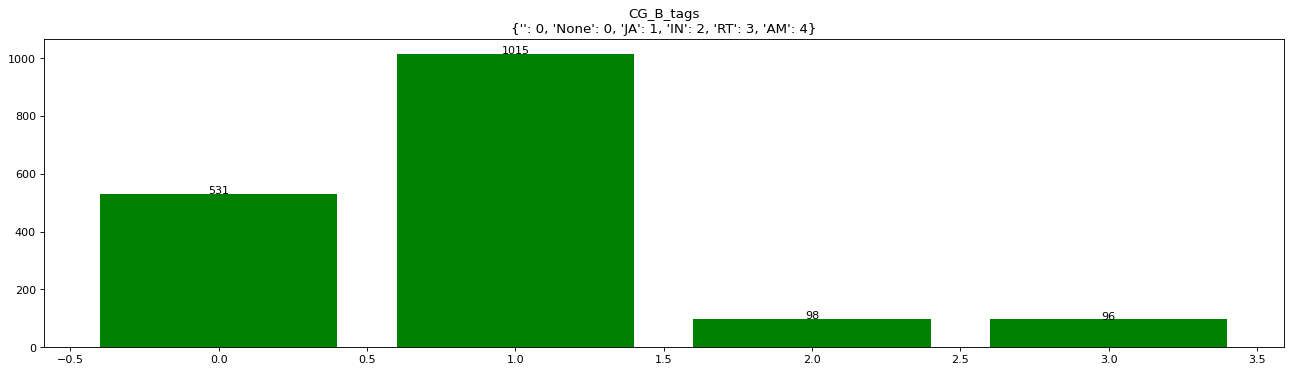

In [218]:
corpus_visualizer(f"CG_B_tags\n{mapping_CG}", CG_B_tags, color="g")

# Corpus Analysis None Events

In [219]:
SUM_Event, SUM_Event_None = len(DF['Event']), 0
SUM_Bel_A_0, SUM_Bel_B_0, SUM_Bel_A_0_Bel_B_0 = 0, 0, 0
SUM_Event_None_Bel_A_0, SUM_Event_None_Bel_B_0, SUM_Event_None_Bel_A_0_Bel_B_0 = 0, 0, 0
SUM = 0

for i in range(SUM_Event):
    if DF['Event'][i]=='None': SUM_Event_None += 1
    if DF['Bel(A)'][i]==0: SUM_Bel_A_0 += 1
    if DF['Bel(B)'][i]==0: SUM_Bel_B_0 += 1
    if DF['Bel(A)'][i]==0 and DF['Bel(B)'][i]==0: SUM_Bel_A_0_Bel_B_0 += 1
    if DF['Event'][i]=='None' and DF['Bel(A)'][i]==0: SUM_Event_None_Bel_A_0 += 1
    if DF['Event'][i]=='None' and DF['Bel(B)'][i]==0: SUM_Event_None_Bel_B_0 += 1
    if DF['Event'][i]=='None' and DF['Bel(A)'][i]==0 and DF['Bel(B)'][i]==0: SUM_Event_None_Bel_A_0_Bel_B_0 += 1
    if DF['Event'][i]!='None' and DF['Bel(A)'][i]==0 and DF['Bel(B)'][i]==0: SUM += 1

print("Events number is:", SUM_Event)
print("[Event=None]:", SUM_Event_None)
print("[Bel(A)=0]:", SUM_Bel_A_0)
print("[Bel(B)=0]:", SUM_Bel_B_0)
print("[Bel(A)=0 & Bel(B)=0]:", SUM_Bel_A_0_Bel_B_0)
print("[Event=None & Bel(A)=0]:", SUM_Event_None_Bel_A_0)
print("[Event=None & Bel(B)=0]:", SUM_Event_None_Bel_B_0)
print("[Event=None & Bel(A)=0 & Bel(B)=0]:", SUM_Event_None_Bel_A_0_Bel_B_0)
print("[Event=!None & Bel(A)=0 & Bel(B)=0]:", SUM)

Events number is: 1740
[Event=None]: 455
[Bel(A)=0]: 466
[Bel(B)=0]: 464
[Bel(A)=0 & Bel(B)=0]: 445
[Event=None & Bel(A)=0]: 442
[Event=None & Bel(B)=0]: 440
[Event=None & Bel(A)=0 & Bel(B)=0]: 431
[Event=!None & Bel(A)=0 & Bel(B)=0]: 14


# Event Preprocessing

1. Records that do not have an event for a sentence but have the tag Bel(A) **OR** Bel(B) are placed with the value of the sentence for the event.

In [220]:
condition = (DF['Sentence']!='None') & (DF['Event']=='None') & ((DF['Bel(A)']!=0) | (DF['Bel(B)']!=0))
subset = DF[condition]
subset

,Sentence,Eno.,Event,Bel(A),Bel(B),CG(A),CG(B)
68,A: yeah.,42.0,None,0,1,1,1
201,A: The kid sister thing?,125.0,None,1,1,1,1
383,B: %um. yeah I guess.,33.0,None,0,3,1,1
400,B: yeah he is finished.,41.0,None,1,0,1,1
430,A: Excellent,60.0,None,1,1,0,0
519,A: Battery operated deal.,111.0,None,0,2,3,3
710,A: yeah ((I’m still here)) [distortion],217.0,None,1,0,1,1
1026,A: Yes. uh-huh.,152.0,None,0,1,1,1
1214,B: What?,272.0,None,0,2,3,3
1215,B: okay.,273.0,None,0,1,1,1


2. After executing the first step, we delete the records that do not have event and Bel(A) **AND** Bel(B) tags.

In [221]:
condition = (DF['Sentence']!='None') & (DF['Event']=='None') & (DF['Bel(A)']==0) & (DF['Bel(B)']==0)
subset = DF[condition]
subset

,Sentence,Eno.,Event,Bel(A),Bel(B),CG(A),CG(B)
3,B: mhm.,2.0,None,0,0,0,0
5,B: mhm.,4.0,None,0,0,0,0
14,B: mhm [distorted],7.0,None,0,0,0,0
15,B: mhm.,8.0,None,0,0,0,0
16,B: mhm.,9.0,None,0,0,0,0
...,...,...,...,...,...,...,...
1680,B: %mm.,184.0,None,0,0,0,0
1684,B: yeah.,187.0,None,0,0,0,0
1685,B: yeah.,188.0,None,0,0,0,0
1706,B: yeah.,195.0,None,0,0,0,0


3. We have events that have not been tagged Bel(A) or Bel(B).

In [222]:
condition = (DF['Event']!='None') & (DF['Bel(A)']==0) & (DF['Bel(B)']==0)
subset = DF[condition]
subset

,Sentence,Eno.,Event,Bel(A),Bel(B),CG(A),CG(B)
420,A: Maybe early June.,53.0,Kevin and A won't move till maybe early June,0,0,0,0
479,A: Don’t we did one time we were like we were ...,89.1,Kevin and A were travlleing in he car,0,0,0,0
534,A: {inhale} Don’t ever do that again.,123.0,A won't use the battery operated pump again,0,0,0,0
557,A: if y- if it was a choice in your life to sa...,140.0,(If using the pump was a choice in one's life),0,0,0,0
650,None,190.4,A was pumping too much,0,0,0,0
1159,B: No. th- {laugh},238.0,B laughs at A's swearing at the lawyer,0,0,0,0
1160,A: And %um {laugh},239.0,A laughs about swearing at the lawyer,0,0,0,0
1191,None,258.3,The lawyer's partner is not even an adoption a...,0,0,0,0
1287,A: birds and colors. And also in parts of &Sp...,312.1,In parts of Spain people have wide streets wit...,0,0,0,0
1288,None,312.2,A doesn't know if people have wide streets wit...,0,0,0,0


### data cleaning

In [223]:
clean_DF = DF.copy()

for i in range(len(DF['Event'])):
    if DF['Sentence'][i]!='None' and DF['Event'][i]=='None' and ( DF['Bel(A)'][i]!=0 or DF['Bel(B)'][i]!=0 ):
        clean_DF['Event'][i] = DF['Sentence'][i].replace(":", " says")

<ipython-input-223-8b024f2b7960>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_DF['Event'][i] = DF['Sentence'][i].replace(":", " says")


In [224]:
clean_DF

,Sentence,Eno.,Event,Bel(A),Bel(B),CG(A),CG(B)
0,"A: %um but although they solicit, they’re tryi...",1.1,"Although the company solicits, the company is ...",1,1,1,1
1,None,1.2,The company solicits,1,1,2,2
2,None,1.3,The company is trying to solicit more througho...,1,1,1,1
3,B: mhm.,2.0,None,0,0,0,0
4,A: although they’ve had most interest in &Japa...,3.0,The company have had most interest in Japan,1,1,1,1
...,...,...,...,...,...,...,...
1735,None,208.3,A's sons never treat one another like A and B'...,3,3,1,1
1736,B: True. I don’t think my kids will be that wa...,209.1,B doesn't think B's kids will be like A and B'...,1,1,1,1
1737,None,209.2,B's kids will be like A and B's mom and dad,3,3,1,1
1738,A: And he just looked at me. [channel noise],210.0,A and B's dad just looked at A,1,1,1,1


In [225]:
# clean_DF.to_csv("Common_Ground_Corpus.csv", index=False)

In [226]:
condition = (clean_DF['Bel(A)']==0) & (clean_DF['Bel(B)']==0)
clean_DF = clean_DF[~condition]
clean_DF.index = [x for x in range(0, len(clean_DF.values))]
clean_DF

,Sentence,Eno.,Event,Bel(A),Bel(B),CG(A),CG(B)
0,"A: %um but although they solicit, they’re tryi...",1.1,"Although the company solicits, the company is ...",1,1,1,1
1,None,1.2,The company solicits,1,1,2,2
2,None,1.3,The company is trying to solicit more througho...,1,1,1,1
3,A: although they’ve had most interest in &Japa...,3.0,The company have had most interest in Japan,1,1,1,1
4,A: And I teach probably two classes and then d...,5.1,A teaches two classes,1,1,1,1
...,...,...,...,...,...,...,...
1290,None,208.3,A's sons never treat one another like A and B'...,3,3,1,1
1291,B: True. I don’t think my kids will be that wa...,209.1,B doesn't think B's kids will be like A and B'...,1,1,1,1
1292,None,209.2,B's kids will be like A and B's mom and dad,3,3,1,1
1293,A: And he just looked at me. [channel noise],210.0,A and B's dad just looked at A,1,1,1,1


# Clean Corpus visualization

In [227]:
Bel_A_tags, Bel_B_tags, CG_A_tags, CG_B_tags = {}, {}, {}, {}

for i in range(len(clean_DF['Bel(A)'])):
    tag = clean_DF['Bel(A)'][i]
    if tag not in Bel_A_tags.keys(): Bel_A_tags[tag]=0
    if tag in Bel_A_tags.keys(): Bel_A_tags[tag]+=1

    tag = clean_DF['Bel(B)'][i]
    if tag not in Bel_B_tags.keys(): Bel_B_tags[tag]=0
    if tag in Bel_B_tags.keys(): Bel_B_tags[tag]+=1

    tag = clean_DF['CG(A)'][i]
    if tag not in CG_A_tags.keys(): CG_A_tags[tag]=0
    if tag in CG_A_tags.keys(): CG_A_tags[tag]+=1

    tag = clean_DF['CG(B)'][i]
    if tag not in CG_B_tags.keys(): CG_B_tags[tag]=0
    if tag in CG_B_tags.keys(): CG_B_tags[tag]+=1


In [228]:
Bel_A_tags = dict(sorted(Bel_A_tags.items()))
Bel_B_tags = dict(sorted(Bel_B_tags.items()))
CG_A_tags = dict(sorted(CG_A_tags.items()))
CG_B_tags = dict(sorted(CG_B_tags.items()))

In [229]:
print("Bel_A_tags: ", Bel_A_tags)
print("Bel_B_tags: ", Bel_B_tags)
print("CG_A_tags: ", CG_A_tags)
print("CG_B_tags: ", CG_B_tags)

Bel_A_tags:  {0: 21, 1: 1045, 2: 89, 3: 98, 4: 42}
Bel_B_tags:  {0: 19, 1: 1054, 2: 89, 3: 86, 4: 47}
CG_A_tags:  {0: 95, 1: 1016, 2: 91, 3: 93}
CG_B_tags:  {0: 95, 1: 1014, 2: 91, 3: 95}


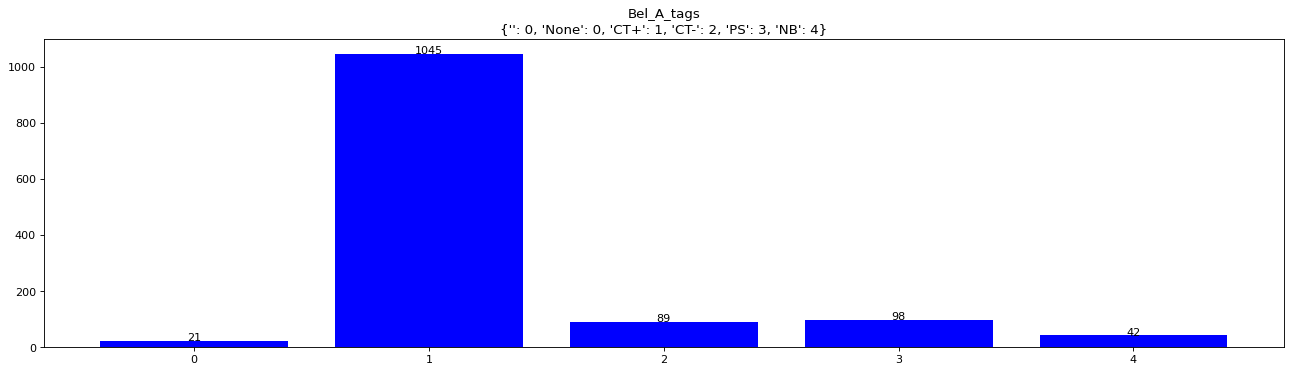

In [230]:
corpus_visualizer(f"Bel_A_tags\n{mapping_Bel}", Bel_A_tags)

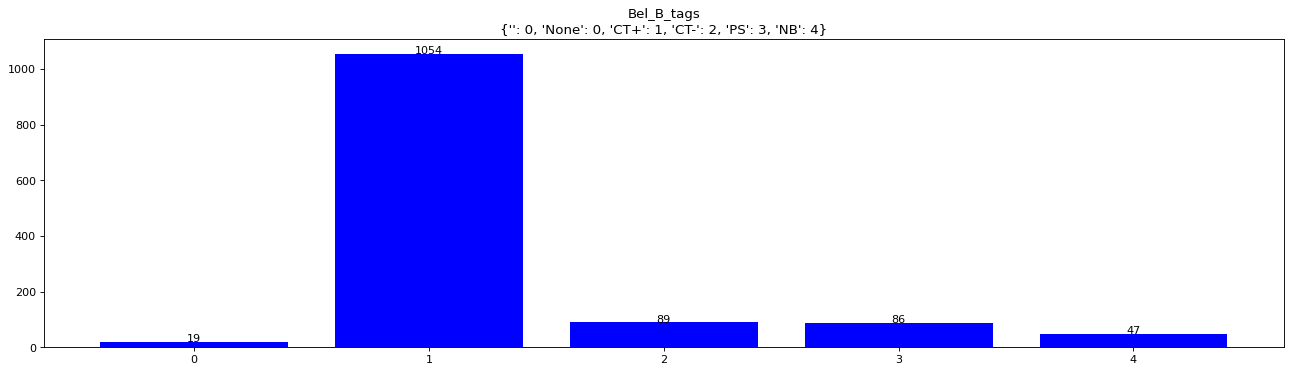

In [231]:
corpus_visualizer(f"Bel_B_tags\n{mapping_Bel}", Bel_B_tags)

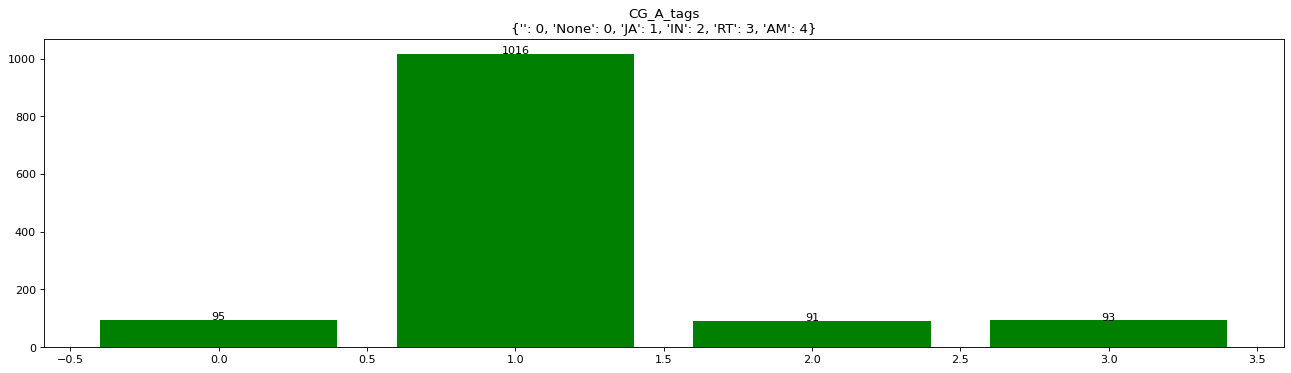

In [232]:
corpus_visualizer(f"CG_A_tags\n{mapping_CG}", CG_A_tags, color="g")

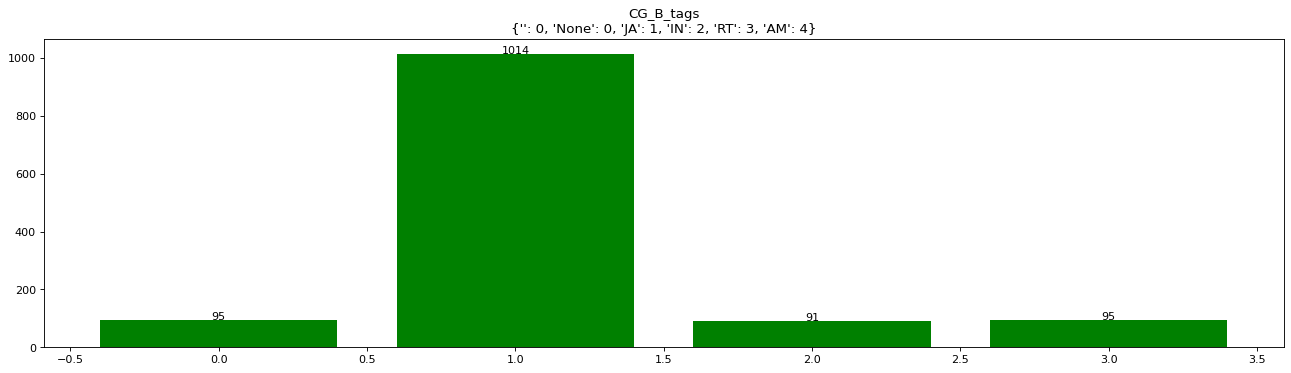

In [233]:
corpus_visualizer(f"CG_B_tags\n{mapping_CG}", CG_B_tags, color="g")

# Make memory and save context

## Make conversations df list: each element is one conversation

In [234]:
conversations_df_list = []

### Split all conversations


In [235]:
start = 0
for i in range(len(clean_DF['Eno.'])):
  if i>0:
    if clean_DF['Eno.'][i-1] > clean_DF['Eno.'][i]:
      df_new = clean_DF.iloc[start:i].reset_index(drop=True)
      start = i
      conversations_df_list.append(df_new)
df_new = clean_DF.iloc[start:].reset_index(drop=True)
conversations_df_list.append(df_new)

### Add sentence number column to each Conversation

In [236]:
sentences_numbers_list = []
SUM = 0
for i in range(len(conversations_df_list[0])):
  if conversations_df_list[0]['Sentence'][i] != 'None':
    SUM += 1
    sentences_numbers_list.append(SUM)
  else: sentences_numbers_list.append(SUM)

conversations_df_list[0]['Sentence_Number'] = sentences_numbers_list
conversations_df_list[0] = conversations_df_list[0].reindex(columns=['Sentence_Number'] + list(conversations_df_list[0].columns[:-1]))
conversations_df_list[0]

,Sentence_Number,Sentence,Eno.,Event,Bel(A),Bel(B),CG(A),CG(B)
0,1,"A: %um but although they solicit, they’re tryi...",1.1,"Although the company solicits, the company is ...",1,1,1,1
1,1,None,1.2,The company solicits,1,1,2,2
2,1,None,1.3,The company is trying to solicit more througho...,1,1,1,1
3,2,A: although they’ve had most interest in &Japa...,3.0,The company have had most interest in Japan,1,1,1,1
4,3,A: And I teach probably two classes and then d...,5.1,A teaches two classes,1,1,1,1
...,...,...,...,...,...,...,...,...
221,103,None,197.2,The new expression meant something when A said...,1,1,2,2
222,103,None,197.3,A said the new expression then,1,1,1,1
223,104,"A: %uh I, I need to know more information.",198.1,A needs to know more information,1,1,1,1
224,104,None,198.2,A knows more information,2,2,3,3


In [237]:
sentences_numbers_list = []
SUM = 0
for i in range(len(conversations_df_list[1])):
  if conversations_df_list[1]['Sentence'][i] != 'None':
    SUM += 1
    sentences_numbers_list.append(SUM)
  else: sentences_numbers_list.append(SUM)

conversations_df_list[1]['Sentence_Number'] = sentences_numbers_list
conversations_df_list[1] = conversations_df_list[1].reindex(columns=['Sentence_Number'] + list(conversations_df_list[1].columns[:-1]))
conversations_df_list[1]

,Sentence_Number,Sentence,Eno.,Event,Bel(A),Bel(B),CG(A),CG(B)
0,1,B: because I drove across the country three ti...,3.1,B has been in the national park like five or s...,1,1,1,1
1,1,None,3.2,B has been in the national park like five or s...,1,3,1,3
2,1,None,3.3,B drove acress the country three times,1,1,1,1
3,1,None,3.4,B thinks that B has been in the national park ...,1,1,1,1
4,1,None,3.5,B has been in the national park three times,3,3,1,1
...,...,...,...,...,...,...,...,...
329,134,None,234.3,One really drinks milk this time,2,2,3,3
330,134,None,234.4,One better eat one's cottage cheese now,1,1,1,1
331,134,None,234.5,One eats one's cottage cheese now,2,2,3,3
332,135,B: {laugh} I Know.,235.0,B knows Everybody is probably saying now one b...,1,1,1,1


In [238]:
sentences_numbers_list = []
SUM = 0
for i in range(len(conversations_df_list[2])):
  if conversations_df_list[2]['Sentence'][i] != 'None':
    SUM += 1
    sentences_numbers_list.append(SUM)
  else: sentences_numbers_list.append(SUM)

conversations_df_list[2]['Sentence_Number'] = sentences_numbers_list
conversations_df_list[2] = conversations_df_list[2].reindex(columns=['Sentence_Number'] + list(conversations_df_list[2].columns[:-1]))
conversations_df_list[2]

,Sentence_Number,Sentence,Eno.,Event,Bel(A),Bel(B),CG(A),CG(B)
0,1,B: So tell me a little bit about the day she w...,1.1,B asks A to tell B a little bit about the day ...,1,1,1,1
1,1,None,1.2,A tells B a little bit about the day Mae was born,0,3,0,0
2,1,None,1.3,Mae was born,1,1,2,2
3,1,None,1.4,B asks A when did A first saw Mae,1,1,1,1
4,1,None,1.5,A first saw Mae somewhere,1,1,2,2
...,...,...,...,...,...,...,...,...
405,172,None,343.2,A and B's mom and dad were at A and Robert's home,1,1,2,2
406,173,A: They came Saturday and stayed Saturday nigh...,344.1,A and B's mom and dad came Saturday,1,1,1,1
407,173,None,344.2,A and B's mom and dad stayed Saturday night,1,1,1,1
408,173,None,344.3,A and B's mom and dad left Monday,1,1,1,1


In [239]:
sentences_numbers_list = []
SUM = 0
for i in range(len(conversations_df_list[3])):
  if conversations_df_list[3]['Sentence'][i] != 'None':
    SUM += 1
    sentences_numbers_list.append(SUM)
  else: sentences_numbers_list.append(SUM)

conversations_df_list[3]['Sentence_Number'] = sentences_numbers_list
conversations_df_list[3] = conversations_df_list[3].reindex(columns=['Sentence_Number'] + list(conversations_df_list[3].columns[:-1]))
conversations_df_list[3]

,Sentence_Number,Sentence,Eno.,Event,Bel(A),Bel(B),CG(A),CG(B)
0,1,B: %um I took them to %uh &Jill’s and they spe...,1.1,B took the kids to Jill's,1,1,1,1
1,1,None,1.2,The kids spent two days at Jill's,1,1,1,1
2,1,None,1.3,B guesses Jill couldn't take the kids,1,1,1,1
3,1,None,1.4,Jill couldn't take the kids,3,3,1,1
4,1,None,1.5,The kid's mom and dad came,1,1,1,1
...,...,...,...,...,...,...,...,...
320,144,None,208.3,A's sons never treat one another like A and B'...,3,3,1,1
321,145,B: True. I don’t think my kids will be that wa...,209.1,B doesn't think B's kids will be like A and B'...,1,1,1,1
322,145,None,209.2,B's kids will be like A and B's mom and dad,3,3,1,1
323,146,A: And he just looked at me. [channel noise],210.0,A and B's dad just looked at A,1,1,1,1


#### reorder conversation for train test split

In [ ]:
# conversations_df_list[0], conversations_df_list[1], conversations_df_list[2], conversations_df_list[3] =  conversations_df_list[0], conversations_df_list[2], conversations_df_list[3], conversations_df_list[1]

### calculate support for classes(CT+, CT-, PS, NB) for each conversation

In [240]:
def cal_class_support(dialogue_number=0):
  # Bel(A)
  Bel_A_support = {}
  SUM_1, SUM_2, SUM_3, SUM_4 = 0, 0, 0, 0
  for record in conversations_df_list[dialogue_number]['Bel(A)']:
    if record== 1 : SUM_1+=1
    if record == 2: SUM_2+=1
    if record == 3: SUM_3+=1
    if record== 4: SUM_4+=1
  Bel_A_support = {"CT+": SUM_1, "CT-": SUM_2, "PS": SUM_3, "NB": SUM_4}

  SUM_1, SUM_2, SUM_3, SUM_4 = 0, 0, 0, 0
  # Bel(B)
  Bel_B_support = {}
  for record in conversations_df_list[dialogue_number]['Bel(B)']:
    if record== 1 : SUM_1+=1
    if record == 2: SUM_2+=1
    if record == 3: SUM_3+=1
    if record== 4: SUM_4+=1
  Bel_B_support = {"CT+": SUM_1, "CT-": SUM_2, "PS": SUM_3, "NB": SUM_4}

  return Bel_A_support, Bel_B_support

In [241]:
print(cal_class_support(0))
print(cal_class_support(1))
print(cal_class_support(2))
print(cal_class_support(3))

({'CT+': 209, 'CT-': 10, 'PS': 2, 'NB': 2}, {'CT+': 211, 'CT-': 9, 'PS': 1, 'NB': 3})
({'CT+': 247, 'CT-': 26, 'PS': 27, 'NB': 31}, {'CT+': 247, 'CT-': 26, 'PS': 27, 'NB': 32})
({'CT+': 328, 'CT-': 18, 'PS': 49, 'NB': 5}, {'CT+': 334, 'CT-': 18, 'PS': 44, 'NB': 8})
({'CT+': 261, 'CT-': 35, 'PS': 20, 'NB': 4}, {'CT+': 262, 'CT-': 36, 'PS': 14, 'NB': 4})


## Make context_based for each corpus

In [242]:
context_based_dict_on_previous_event_base_2 = {'Speaker': [], 'Sentence_Number': [], 'Sentence': [], 'Event': [], 'Target_Event': [], 'Bel(A)': [], 'Bel(B)': [], 'CG(A)': [], 'CG(B)': []}
context_based_dict_on_previous_speaker_based_event = {'Speaker': [], 'Sentence_Number': [], 'Sentence': [], 'Event': [], 'Target_Event': [], 'Bel(A)': [], 'Bel(B)': [], 'CG(A)': [], 'CG(B)': []}

## 1. on_previous_event_base_2

In [243]:
window_size = 2 # 3 Sentence (current and 2 previous sentences and 2 next sentences)
event_number = len(clean_DF['Event'])

In [244]:
start = 0

for conversation_df in conversations_df_list:
  event_number = len(conversation_df['Event'])
  speaker = ""

  for i in range(event_number):
      sentence_number = conversation_df['Sentence_Number'][i]

      # 1. Target Event
      current_event = "Target Sentence: " + conversation_df['Event'].get(i)

      # Who is Speaker?
      if conversation_df['Sentence'].get(i)!="None":
          speaker = conversation_df['Sentence'].get(i)[0]

      # 2. Previous Sentences
      j = i
      memory_list = []
      if j>0:
        while (sentence_number-conversation_df['Sentence_Number'].get(j-1)-window_size-1 != 0) and j>0:
            j -= 1
            event = conversation_df['Event'].get(j)
            memory_list.append(event)
            if j == 0: break
      previous_sentences = "Previous Sentences: "
      for event in reversed(memory_list): previous_sentences += event + " "

      # 3. Next Sentences
      j = i
      memory_list = []
      if j < event_number-1:
        while (sentence_number-conversation_df['Sentence_Number'].get(j+1)+1+window_size != 0):
            j += 1
            if j<event_number:
              event = conversation_df['Event'].get(j)
              memory_list.append(event)
            if j == event_number-1: break
      next_sentences = "Next Sentences: "
      for event in memory_list: next_sentences += event + " "

      context_based_event_on_previous = previous_sentences + "\n" + current_event
      context_based_event_on_previous_and_next = previous_sentences + "\n" + current_event + "\n" + next_sentences

      print(f"{str(i)} \nspeaker: {speaker} \n\n{context_based_event_on_previous} \n\n{context_based_event_on_previous_and_next}")
      print("---------------------------------------")
      context_based_dict_on_previous_event_base_2['Speaker'].append(speaker)
      context_based_dict_on_previous_event_base_2['Sentence_Number'].append(sentence_number)
      context_based_dict_on_previous_event_base_2['Sentence'].append(conversation_df['Sentence'].get(i))
      context_based_dict_on_previous_event_base_2['Event'].append(context_based_event_on_previous)
      context_based_dict_on_previous_event_base_2['Target_Event'].append(conversation_df['Event'].get(i))
      context_based_dict_on_previous_event_base_2['Bel(A)'].append(conversation_df['Bel(A)'].get(i))
      context_based_dict_on_previous_event_base_2['Bel(B)'].append(conversation_df['Bel(B)'].get(i))
      context_based_dict_on_previous_event_base_2['CG(A)'].append(conversation_df['CG(A)'].get(i))
      context_based_dict_on_previous_event_base_2['CG(B)'].append(conversation_df['CG(B)'].get(i))

Streaming output truncated to the last 5000 lines.
235 
speaker: A 

Previous Sentences: The birth mother has what one calls the fourth bracelet, which the birth mother can give to whoever will be the birth mother's coach through the birth and stuff The mother has what one calls the fourth bracelet The birth mother can give the fourth bracelet to whoever will be the birth mother's coach through the birth and stuff Some will coach the birth  mother through the birth and stuff Of course the birth mother had given the fourth bracelet to the birth mother's mother The birth's  mother giving the fourth bracelet to the birth mother's mother makes perfect sense 
Target Sentence: The nurses could not get the nurses' minds around the notion of a fifth bracelet for A and Robert 

Previous Sentences: The birth mother has what one calls the fourth bracelet, which the birth mother can give to whoever will be the birth mother's coach through the birth and stuff The mother has what one calls the fourt

## 2. on_previous_speaker_based_event_based

In [245]:
event_number = len(clean_DF['Event'])
start = 0
for conversation_df in conversations_df_list:
  event_number = len(conversation_df['Event'])
  speaker = ""

  for i in range(event_number):
      sentence_number = conversation_df['Sentence_Number'][i]

      # 1. Target Event
      current_event = "Target Sentence: " + conversation_df['Event'].get(i)

      # Who is Speaker?
      if conversation_df['Sentence'].get(i)!="None":
          speaker = conversation_df['Sentence'].get(i)[0]

      # 2. Previous Sentences
      j = i
      memory_list = []
      if j>0:
        while ((speaker == conversation_df['Sentence'].get(j)[0]) | (conversation_df['Sentence'].get(j)=="None")) and j>0:
            j -= 1
            event = conversation_df['Event'].get(j)
            memory_list.append(event)
            if j == 0: break
      previous_sentences = "Previous Sentences: "
      for event in reversed(memory_list): previous_sentences += event + " "

      # 3. Next Sentences
      j = i
      memory_list = []
      if j < event_number-1:
        while ((speaker == conversation_df['Sentence'].get(j)[0]) | (conversation_df['Sentence'].get(j)=="None")):
            j += 1
            if j<event_number:
              event = conversation_df['Event'].get(j)
              memory_list.append(event)
            if j == event_number-1: break
        else:
          j+=1
          while (conversation_df['Sentence'].get(j)=="None"):
            if j<event_number:
              event = conversation_df['Event'].get(j)
              memory_list.append(event)
            if j == event_number-1: break
            j+=1

      next_sentences = "Next Sentences: "
      for event in memory_list: next_sentences += event + " "

      context_based_event_on_previous = previous_sentences + "\n" + current_event
      context_based_event_on_previous_and_next = previous_sentences + "\n" + current_event + "\n" + next_sentences

      print(f"{str(i)} \nspeaker: {speaker} \n\n{context_based_event_on_previous} \n\n{context_based_event_on_previous_and_next}")
      print("---------------------------------------")
      context_based_dict_on_previous_speaker_based_event['Speaker'].append(speaker)
      context_based_dict_on_previous_speaker_based_event['Sentence_Number'].append(sentence_number)
      context_based_dict_on_previous_speaker_based_event['Sentence'].append(conversation_df['Sentence'].get(i))
      context_based_dict_on_previous_speaker_based_event['Event'].append(context_based_event_on_previous)
      context_based_dict_on_previous_speaker_based_event['Target_Event'].append(conversation_df['Event'].get(i))
      context_based_dict_on_previous_speaker_based_event['Bel(A)'].append(conversation_df['Bel(A)'].get(i))
      context_based_dict_on_previous_speaker_based_event['Bel(B)'].append(conversation_df['Bel(B)'].get(i))
      context_based_dict_on_previous_speaker_based_event['CG(A)'].append(conversation_df['CG(A)'].get(i))
      context_based_dict_on_previous_speaker_based_event['CG(B)'].append(conversation_df['CG(B)'].get(i))

Streaming output truncated to the last 5000 lines.
235 
speaker: A 

Previous Sentences: B asks A if the nurses told A about Mae's apgar or whatever the nurses call the newborn's score The nurses told A about Mae's apgar or whatever the nurses call the newborn's score The nurses call the newborn's score something The nurses did not tell A and Robert anything The individual people A and Robert had contact with at the hospital were decent and friendly to A and Robert A and Robert had contact with individual people at the hospital But the hospital policy was rather unfriendly to A and Robert The hospital have a room called the bonding room The whole purpose of the bonding room is to let people be in the bonding room with the baby People are in the bonding room with the baby The nurses would not let A and Robert in the bonding room A and Robert's not being able to enter the bonding room was really quite awful The nurses did not tell A and Robert beans The nurses really did not talk to A an

## Make Dataset

In [246]:
context_based_DF1 = pd.DataFrame.from_dict(context_based_dict_on_previous_event_base_2)
context_based_DF2 = pd.DataFrame.from_dict(context_based_dict_on_previous_speaker_based_event)

In [247]:
context_based_DF1

,Speaker,Sentence_Number,Sentence,Event,Target_Event,Bel(A),Bel(B),CG(A),CG(B)
0,A,1,"A: %um but although they solicit, they’re tryi...",Previous Sentences: \nTarget Sentence: Althoug...,"Although the company solicits, the company is ...",1,1,1,1
1,A,1,None,Previous Sentences: Although the company solic...,The company solicits,1,1,2,2
2,A,1,None,Previous Sentences: Although the company solic...,The company is trying to solicit more througho...,1,1,1,1
3,A,2,A: although they’ve had most interest in &Japa...,Previous Sentences: Although the company solic...,The company have had most interest in Japan,1,1,1,1
4,A,3,A: And I teach probably two classes and then d...,Previous Sentences: Although the company solic...,A teaches two classes,1,1,1,1
...,...,...,...,...,...,...,...,...,...
1290,A,144,None,Previous Sentences: A asks B if B knows what A...,A's sons never treat one another like A and B'...,3,3,1,1
1291,B,145,B: True. I don’t think my kids will be that wa...,Previous Sentences: B doesn't know what A said...,B doesn't think B's kids will be like A and B'...,1,1,1,1
1292,B,145,None,Previous Sentences: B doesn't know what A said...,B's kids will be like A and B's mom and dad,3,3,1,1
1293,A,146,A: And he just looked at me. [channel noise],Previous Sentences: A said A hopes that A's so...,A and B's dad just looked at A,1,1,1,1


In [248]:
context_based_DF2

,Speaker,Sentence_Number,Sentence,Event,Target_Event,Bel(A),Bel(B),CG(A),CG(B)
0,A,1,"A: %um but although they solicit, they’re tryi...",Previous Sentences: \nTarget Sentence: Althoug...,"Although the company solicits, the company is ...",1,1,1,1
1,A,1,None,Previous Sentences: Although the company solic...,The company solicits,1,1,2,2
2,A,1,None,Previous Sentences: Although the company solic...,The company is trying to solicit more througho...,1,1,1,1
3,A,2,A: although they’ve had most interest in &Japa...,Previous Sentences: Although the company solic...,The company have had most interest in Japan,1,1,1,1
4,A,3,A: And I teach probably two classes and then d...,Previous Sentences: Although the company solic...,A teaches two classes,1,1,1,1
...,...,...,...,...,...,...,...,...,...
1290,A,144,None,Previous Sentences: B doesn't know what A said...,A's sons never treat one another like A and B'...,3,3,1,1
1291,B,145,B: True. I don’t think my kids will be that wa...,Previous Sentences: A said A hopes that A's so...,B doesn't think B's kids will be like A and B'...,1,1,1,1
1292,B,145,None,Previous Sentences: A said A hopes that A's so...,B's kids will be like A and B's mom and dad,3,3,1,1
1293,A,146,A: And he just looked at me. [channel noise],Previous Sentences: B doesn't think B's kids w...,A and B's dad just looked at A,1,1,1,1


### conversation based train test split

In [249]:
print(len(conversations_df_list[0]), len(conversations_df_list[1]), len(conversations_df_list[2]), len(conversations_df_list[3]))

226 334 410 325


In [250]:
train_size = len(conversations_df_list[0]) + len(conversations_df_list[1]) + len(conversations_df_list[2])
train_size

970

#### test set

In [251]:
context_based_DF1[train_size:]

,Speaker,Sentence_Number,Sentence,Event,Target_Event,Bel(A),Bel(B),CG(A),CG(B)
970,B,1,B: %um I took them to %uh &Jill’s and they spe...,Previous Sentences: \nTarget Sentence: B took ...,B took the kids to Jill's,1,1,1,1
971,B,1,None,Previous Sentences: B took the kids to Jill's ...,The kids spent two days at Jill's,1,1,1,1
972,B,1,None,Previous Sentences: B took the kids to Jill's ...,B guesses Jill couldn't take the kids,1,1,1,1
973,B,1,None,Previous Sentences: B took the kids to Jill's ...,Jill couldn't take the kids,3,3,1,1
974,B,1,None,Previous Sentences: B took the kids to Jill's ...,The kid's mom and dad came,1,1,1,1
...,...,...,...,...,...,...,...,...,...
1290,A,144,None,Previous Sentences: A asks B if B knows what A...,A's sons never treat one another like A and B'...,3,3,1,1
1291,B,145,B: True. I don’t think my kids will be that wa...,Previous Sentences: B doesn't know what A said...,B doesn't think B's kids will be like A and B'...,1,1,1,1
1292,B,145,None,Previous Sentences: B doesn't know what A said...,B's kids will be like A and B's mom and dad,3,3,1,1
1293,A,146,A: And he just looked at me. [channel noise],Previous Sentences: A said A hopes that A's so...,A and B's dad just looked at A,1,1,1,1


In [252]:
context_based_DF2[train_size:]

,Speaker,Sentence_Number,Sentence,Event,Target_Event,Bel(A),Bel(B),CG(A),CG(B)
970,B,1,B: %um I took them to %uh &Jill’s and they spe...,Previous Sentences: \nTarget Sentence: B took ...,B took the kids to Jill's,1,1,1,1
971,B,1,None,Previous Sentences: B took the kids to Jill's ...,The kids spent two days at Jill's,1,1,1,1
972,B,1,None,Previous Sentences: B took the kids to Jill's ...,B guesses Jill couldn't take the kids,1,1,1,1
973,B,1,None,Previous Sentences: B took the kids to Jill's ...,Jill couldn't take the kids,3,3,1,1
974,B,1,None,Previous Sentences: B took the kids to Jill's ...,The kid's mom and dad came,1,1,1,1
...,...,...,...,...,...,...,...,...,...
1290,A,144,None,Previous Sentences: B doesn't know what A said...,A's sons never treat one another like A and B'...,3,3,1,1
1291,B,145,B: True. I don’t think my kids will be that wa...,Previous Sentences: A said A hopes that A's so...,B doesn't think B's kids will be like A and B'...,1,1,1,1
1292,B,145,None,Previous Sentences: A said A hopes that A's so...,B's kids will be like A and B's mom and dad,3,3,1,1
1293,A,146,A: And he just looked at me. [channel noise],Previous Sentences: B doesn't think B's kids w...,A and B's dad just looked at A,1,1,1,1


In [253]:
from datasets import Dataset, DatasetDict
from sklearn.model_selection import train_test_split

dataset1 = Dataset.from_pandas(context_based_DF1)
dataset2 = Dataset.from_pandas(context_based_DF2)

In [254]:
train_set1, test_set1 = dataset1[:train_size], dataset1[train_size:]
train_set1, test_set1 = Dataset.from_dict(train_set1), Dataset.from_dict(test_set1)
dataset1 = DatasetDict({"train": train_set1, "test": test_set1})

In [255]:
train_set2, test_set2 = dataset2[:train_size], dataset2[train_size:]
train_set2, test_set2 = Dataset.from_dict(train_set2), Dataset.from_dict(test_set2)
dataset2 = DatasetDict({"train": train_set2, "test": test_set2})

In [256]:
dataset1

DatasetDict({
    train: Dataset({
        features: ['Speaker', 'Sentence_Number', 'Sentence', 'Event', 'Target_Event', 'Bel(A)', 'Bel(B)', 'CG(A)', 'CG(B)'],
        num_rows: 970
    })
    test: Dataset({
        features: ['Speaker', 'Sentence_Number', 'Sentence', 'Event', 'Target_Event', 'Bel(A)', 'Bel(B)', 'CG(A)', 'CG(B)'],
        num_rows: 325
    })
})

In [257]:
dataset2

DatasetDict({
    train: Dataset({
        features: ['Speaker', 'Sentence_Number', 'Sentence', 'Event', 'Target_Event', 'Bel(A)', 'Bel(B)', 'CG(A)', 'CG(B)'],
        num_rows: 970
    })
    test: Dataset({
        features: ['Speaker', 'Sentence_Number', 'Sentence', 'Event', 'Target_Event', 'Bel(A)', 'Bel(B)', 'CG(A)', 'CG(B)'],
        num_rows: 325
    })
})

In [258]:
import pickle

f = open("/content/drive/MyDrive/Corpus/CG_Corpus/cg_3to1_2previous_event_selection.dat", "wb")
pickle.dump(dataset1, f)
f.close()

In [259]:
import pickle

f = open("/content/drive/MyDrive/Corpus/CG_Corpus/cg_3to1_previous_speaker_base_event_selection.dat", "wb")
pickle.dump(dataset2, f)
f.close()

In [ ]:
clean_DF.to_csv('Corpus.csv')

### random train test split

In [ ]:
from datasets import Dataset, DatasetDict
from sklearn.model_selection import train_test_split


def create_train_test_split(context_based_DF):
  dataset = Dataset.from_pandas(context_based_DF)
  train_set, test_set = train_test_split(dataset, test_size=0.3, random_state=42)
  train_set, test_set = Dataset.from_dict(train_set), Dataset.from_dict(test_set)
  return train_set, test_set

In [ ]:
train_set1, test_set1 = create_train_test_split(context_based_DF1)
train_set2, test_set2 = create_train_test_split(context_based_DF2)

dataset1 = DatasetDict({"train": train_set1, "test": test_set1})
dataset2 = DatasetDict({"train": train_set2, "test": test_set2})

In [ ]:
def show_record(record_number, name='train'):
    print(dataset1[name][record_number])
    print(dataset2[name][record_number])

In [ ]:
show_record(13)

{'Speaker': 'A', 'Sentence_Number': 136, 'Sentence': 'A: They would’ve said get your ass in the car.  ', 'Event': 'Previous Sentences: They would have made anybody else come A says sure \nTarget Sentence: They would have said get your ass in the car', 'Target_Event': 'They would have said get your ass in the car', 'Bel(A)': 1, 'Bel(B)': 1, 'CG(A)': 1, 'CG(B)': 1}
{'Speaker': 'A', 'Sentence_Number': 136, 'Sentence': 'A: They would’ve said get your ass in the car.  ', 'Event': "Previous Sentences: They would have made anybody else come A says sure \nTarget Sentence: They would have said get your ass in the car\nNext Sentences: B says they would say god damn we don't want to hear no let's go they would have said no let's go A says whether you're 36 or 26 it doesn't matter ", 'Target_Event': 'They would have said get your ass in the car', 'Bel(A)': 1, 'Bel(B)': 1, 'CG(A)': 1, 'CG(B)': 1}
{'Speaker': 'A', 'Sentence_Number': 136, 'Sentence': 'A: They would’ve said get your ass in the car.  '

# Save and serialize corpus

1. cg_on_previous_event_base_2.dat
15. cg_on_previous_speaker_based_event_based

In [ ]:
import pickle

f = open("/content/drive/MyDrive/Corpus/CG_Corpus/1.dat", "wb")
pickle.dump(dataset1, f)
f.close()

In [ ]:
import pickle

f = open("/content/drive/MyDrive/Corpus/CG_Corpus/2.dat", "wb")
pickle.dump(dataset2, f)
f.close()

### load corpus

In [ ]:
import pickle


f = open("/content/drive/MyDrive/Corpus/CG_Corpus/1.dat", "rb")
dataset4 = pickle.load(f)
f.close()

f = open("/content/drive/MyDrive/Corpus/CG_Corpus/2.dat", "rb")
dataset5 = pickle.load(f)
f.close()